# Multi-fluid modeling of a sheath in an isothermal weakly-ionized collisionless plasma

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visible click here"></form>''')

We present the solutions of a weakly-ionized collisionless plasma between two floating plates. The set of equations that are solved are as follow

$$\partial_t n_e + \partial_x \left( n_e u_e \right) = n_e \text{Da} $$
$$\partial_t n_i + \partial_x \left( n_i u_i \right) = n_e \text{Da} $$
$$\partial_t \left(n_eu_e\right) + \partial_x \left( n_e (u_e^2 + \epsilon^{-1})\right) = \frac{n_e}{\epsilon}\partial_x\phi - \nu_e n_e u_e $$
$$\partial_t \left(n_iu_i\right) + \partial_x \left( n_i (u_i^2 + \kappa)\right) = -n_i\partial_x\phi - \nu_i n_i u_i $$
$$\lambda^2\partial^2_{xx}\phi = n_e - n_i $$

The numerical scheme features:

 - TVD second order reconstruction
 - ospre limiter
 - Forward Euler (1st order for a steady solution)
 - Roe scheme
 - Thomas algorithm

The simulation allows for choosing for the following degrees of freedom

 - $\epsilon$
 - $\kappa$
 - $\nu_e$
 - $\nu_i$
 - $\lambda_D/L$

The ionization is not a proper degree of freedom as it is an eigenvalue of the system to find a steady solution. We compute the ionization as a function of the ion wall flux every time step, as follows

$$\text{Da} = \frac{2\left|\Gamma_{i_w}\right|}{<n_e>L}$$

where the average density is computed as $$<n_e>L = \int_0^L n_e dx$$

Press Shift+enter to read results

In [1]:
import sys  
import os
import numpy as np
# IMPORT PATH TO PYTHONTOOLS MODULE
sys.path.append('../PythonTools') 

import plotResults
import tkinter as tk
from tkinter import filedialog

%gui tk

root = tk.Tk()
root.withdraw()

currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.destroy()
print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))

# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)



Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/1_ProceduralCode/EulerIsothermalProcedural/EulerIsothermalProcedural/11_TestEnergySheath/1_Test_TwoFluidEnergySourceTerm/file_iter_011000_time_4.5591e-03.txt
NbEqs =  7
NbCells =  500


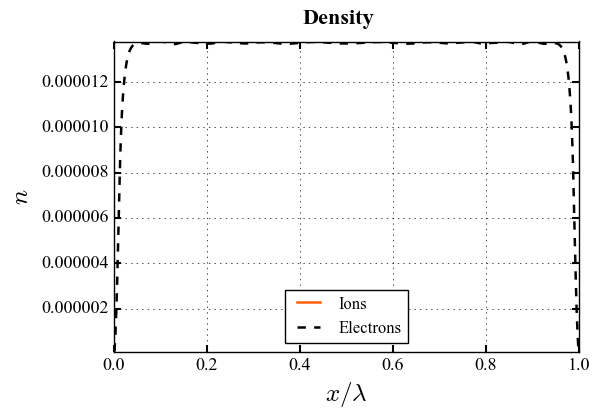

In [2]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
n_e = plotData.resultsArray[1]
n_i = plotData.resultsArray[3]

ax.plot(x, n_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, n_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$n$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)


f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(n_e)
ymax = max(n_e)
ax.set_ylim([ymin,ymax])
ax.grid(True)
plt.show()


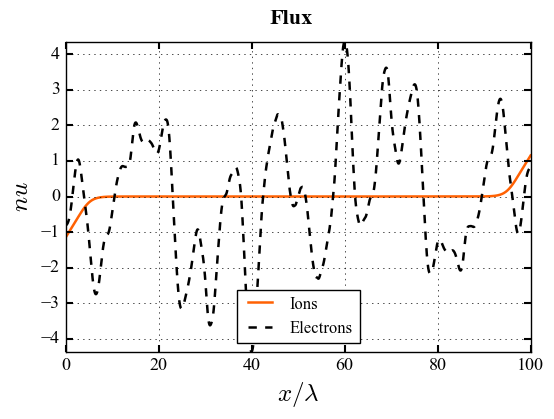

In [3]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
nU_e = plotData.resultsArray[2]
nU_i = plotData.resultsArray[4]

ax.plot(x, nU_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, nU_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$nu$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Flux', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(nU_e)
ymax = max(nU_e)
ax.set_ylim([ymin,ymax])
ax.grid(True)
plt.show()



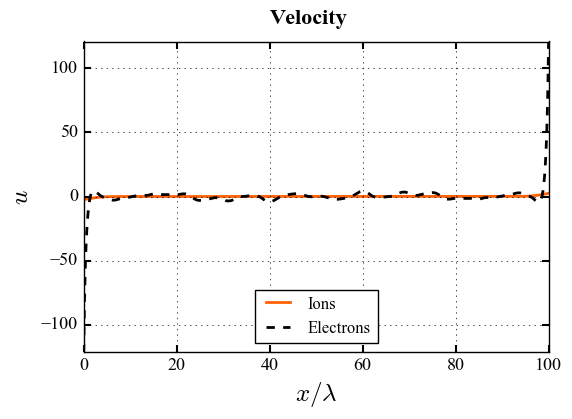

In [4]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
U_e = nU_e[:]/n_e[:]
U_i = nU_i[:]/n_i[:]

ax.plot(x, U_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, U_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$u$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Velocity', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(U_e)
ymax = max(U_e)
ax.set_ylim([ymin,ymax])
ax.grid(True)
plt.show()

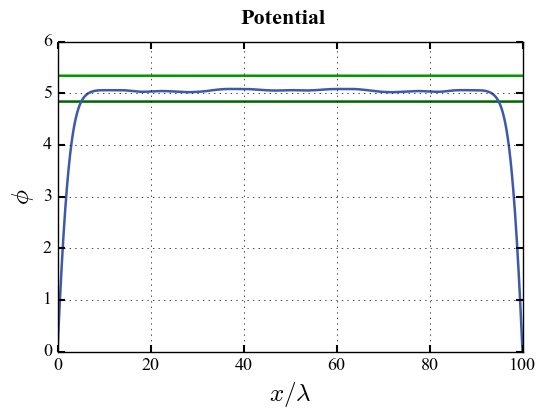

In [5]:
plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = plotData.resultsArray[0]
phi = plotData.resultsArray[5]

MASSRATIO = 100000;
phi_W    = np.log((MASSRATIO/(2*np.pi))**(1/2))*np.ones(x.size);
phi_P    = (phi_W + 0.5)*np.ones(x.size);

ax.plot(x, phi_W, color=(0, 0.4, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi_P, color=(0, 0.6, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi, color=(61/255,89/255,171/255), linewidth=1.8, markersize=3, label ='Potential')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\phi$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
#plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Potential', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

#plt.text(0.9*max(x),1.04*max(phi_W),r'$\phi_W$',fontsize=13,color=(0, 0.4, 0), weight = 'bold')
#plt.text(0.9*max(x),1.04*max(phi_P),r'$\phi_p$',fontsize=13,color=(0, 0.6, 0), weight = 'bold')

#ymin = min(phi)
#ymax = max(phi)
#ax.set_ylim([ymin,1.2*ymax])
ax.grid(True)
plt.show()


